In [1]:
import os
import math
import re
import statistics
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product

#For proper display of all columns
from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")
import gc

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import scipy.stats as stats

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor, Pool

In [15]:
scaled_all_song_correlated_features_csv_path = '../correlated_csv/scaled_all_song_correlated_features_csv.csv'
scaled_bangladesh_song_correlated_features_csv_path = '../correlated_csv/scaled_bangladesh_song_correlated_features_csv.csv'
scaled_kolkata_song_correlated_features_csv_path = '../correlated_csv/scaled_kolkata_song_correlated_features_csv.csv'

In [16]:
corr_alls = pd.read_csv(scaled_all_song_correlated_features_csv_path)
corr_bd = pd.read_csv(scaled_bangladesh_song_correlated_features_csv_path)
corr_ind = pd.read_csv(scaled_kolkata_song_correlated_features_csv_path)

In [17]:
corr_bd_popularity = corr_bd['Popularity']
corr_bd_time_signature = corr_bd['Time Signature']
corr_bd_duration_ms = corr_bd['Duration MS']
corr_bd_tempo = corr_bd['Tempo']
corr_bd_valencs = corr_bd['Valence']
corr_bd_livenss = corr_bd['Liveness']
corr_bd_instrumentalness = corr_bd['Instrumentalness']
corr_bd_acousticness = corr_bd['Acousticness']
corr_bd_speechiness = corr_bd['Speechiness']
corr_bd_loudness = corr_bd['Loudness']
corr_bd_key = corr_bd['Key']          
corr_bd_mode = corr_bd['Mode']
corr_bd_energy = corr_bd['Energy'] 
corr_bd_danceability = corr_bd['Danceability']

In [18]:
corr_ind_popularity = corr_ind['Popularity']
corr_ind_time_signature = corr_ind['Time Signature']
corr_ind_duration_ms = corr_ind['Duration MS']
corr_ind_tempo = corr_ind['Tempo']
corr_ind_valencs = corr_ind['Valence']
corr_ind_livenss = corr_ind['Liveness']
corr_ind_instrumentalness = corr_ind['Instrumentalness']
corr_ind_acousticness = corr_ind['Acousticness']
corr_ind_speechiness = corr_ind['Speechiness']
corr_ind_loudness = corr_ind['Loudness']
corr_ind_key = corr_ind['Key']          
corr_ind_mode = corr_ind['Mode']
corr_ind_energy = corr_ind['Energy'] 
corr_ind_danceability = corr_ind['Danceability'] 

In [19]:
def boxplot(data1,data2,y_label,x_label1,x_label2):
    plt.boxplot([data1, data2])
    
    mean1 = sum(data1) / len(data1)
    median1 = statistics.median(data1)
    mode1 = statistics.mode(data1)
    
    mean2 = sum(data2) / len(data2)
    median2 = statistics.median(data2)
    mode2 = statistics.mode(data2)
    
    print(x_label1,' : ',mean1,',',median1,',',mode1)
    print(x_label2,' : ',mean2,',',median2,',',mode2)
    # set the title and y-axis label
    plt.title('Comparison')
    plt.ylabel(y_label)

    # set x-axis labels
    plt.xticks([1, 2], [x_label1, x_label2])

    # display the plot
    plt.show()

bd danceability  :  0.47854202268137325 , 0.48328025477707004 , 0.7420382165605097
ind danceability  :  0.47735175375137107 , 0.4804088586030666 , 0.3253833049403749


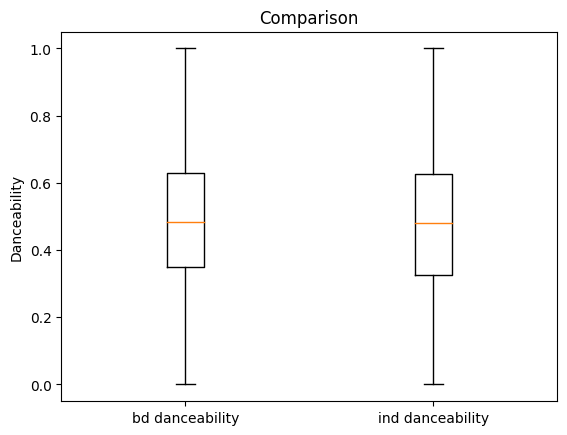

In [20]:
boxplot(corr_bd_danceability,corr_ind_danceability,'Danceability','bd danceability','ind danceability')

In [ ]:
boxplot(bd_danceability,ind_danceability,'Danceability','bd danceability','ind danceability')

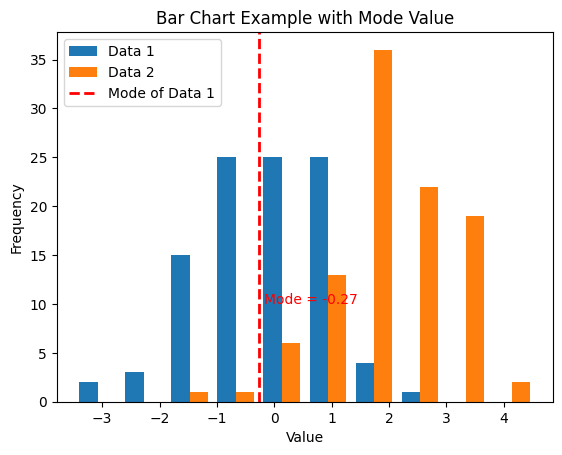

In [14]:
data1 = np.random.normal(loc=0, scale=1, size=100)
data2 = np.random.normal(loc=2, scale=1, size=100)

# calculate the mode of data1
mode_val = statistics.mode(data1)

# create a histogram of data1 and data2
plt.hist([data1, data2], bins=10, label=['Data 1', 'Data 2'])

# annotate the mode value on the chart
plt.axvline(mode_val, color='r', linestyle='--', linewidth=2, label='Mode of Data 1')
plt.annotate('Mode = {:.2f}'.format(mode_val), xy=(mode_val + 0.1, 10), color='r')

# set the title and x/y-axis labels
plt.title('Bar Chart Example with Mode Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# display the plot
plt.show()
